# Generate results and figures
For fmrs/1_two_peak_simulation

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import re
import pandas as pd

## Load the data from the variable lw/eps data

In [2]:

name_parts = re.compile(r'(\w+)_(\d\.\d+)_(\de\-0\d)_(\d\.\d)')
sim_res = Path('sim_results')
type = []
sep = []
nv = []
delta = []
all_df = []
for fp in sim_res.glob('*.csv'):
    type.append(name_parts.search(fp.stem)[1])
    sep.append(float(name_parts.search(fp.stem)[2]))
    nv.append(float(name_parts.search(fp.stem)[3]))
    delta.append(float(name_parts.search(fp.stem)[4]))
    all_df.append(pd.read_csv(fp, index_col=0))

mi = pd.MultiIndex.from_arrays([type, sep, nv])
full_sim_data = pd.concat(all_df, keys=mi)

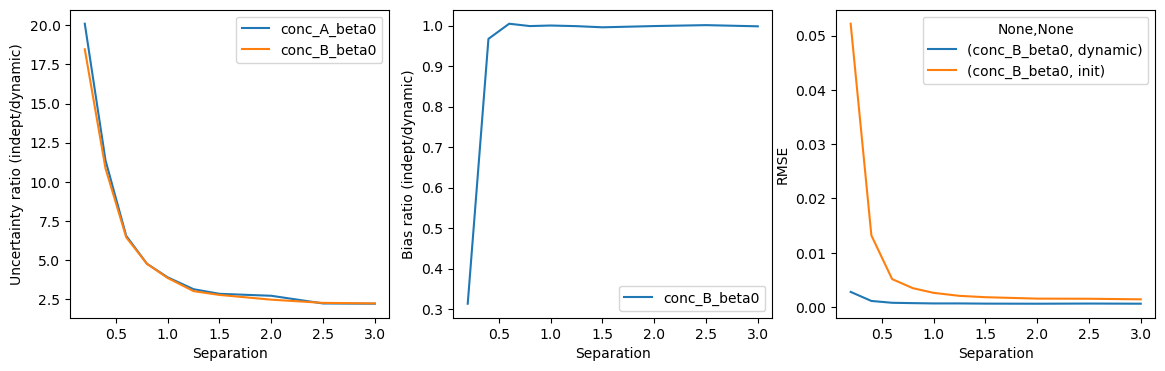

0.20    19.122274
0.40    18.774870
0.60    18.757943
0.80    18.749486
1.00    18.728510
1.25    18.718720
1.50    18.732781
2.00    18.754919
2.50    18.736566
3.00    18.745277
Name: conc_B_beta0, dtype: float64
0.20     6.011149
0.40    18.159886
0.60    18.845118
0.80    18.726967
1.00    18.731824
1.25    18.692918
1.50    18.653502
2.00    18.733368
2.50    18.757700
3.00    18.711594
Name: conc_B_beta0, dtype: float64


In [77]:
# Parameter from simulation to calculate RMSE
simulation_delta = 0.2  # The delta that peak B increases by
fid_scaling = 1.1873  # The automatic internal scaling factor applied by FSL-MRS (scaled by norm of FID)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))
sd_ratio = full_sim_data.groupby(level=[0,1,2]).std().loc['init']\
    / full_sim_data.groupby(level=[0,1,2]).std().loc['dynamic']
sd_ratio_sep = sd_ratio.groupby(level=0).mean()

# Plot the ratio of std as a function of peak separation
sd_ratio_sep[['conc_A_beta0','conc_B_beta0']].plot(ax=ax1)

# Bias
bias_init = full_sim_data.groupby(level=[0,1,2]).mean().loc['init']
bias_dyn = full_sim_data.groupby(level=[0,1,2]).mean().loc['dynamic']

bias_init['conc_B_beta0'] -= simulation_delta
bias_dyn['conc_B_beta0'] -= simulation_delta

bias_ratio = bias_init / bias_dyn
bias_ratio_sep = bias_ratio.groupby(level=0).mean()
bias_ratio_sep[['conc_B_beta0']].plot(ax=ax2)

# RMSE
rmse = (full_sim_data.filter(like='conc_B_beta0')/fid_scaling - simulation_delta)\
    .pow(2)\
    .groupby(level=[0,1,2])\
    .mean()\
    .pow(0.5)

rmse.groupby(level=[0,1]).mean().unstack(level=0).plot(ax=ax3)

ax1.set_xlabel('Separation')
ax2.set_xlabel('Separation')
ax3.set_xlabel('Separation')

ax1.set_ylabel('Uncertainty ratio (indept/dynamic)')
ax2.set_ylabel('Bias ratio (indept/dynamic)')
ax3.set_ylabel('RMSE')

plt.show()

## Calculate bias as ratio to true parameter
print(100 * bias_dyn.groupby(level=0).mean()['conc_B_beta0']/simulation_delta)
print(100 * bias_init.groupby(level=0).mean()['conc_B_beta0']/simulation_delta)


In [4]:
from pathlib import Path
import re
import pandas as pd
name_parts = re.compile(r'(\w+)_(\d\.\d+)_(\de\-0\d)_(\d\.\d)')
sim_res = Path('sim_results_linked')
type = []
sep = []
nv = []
delta = []
all_df = []
for fp in sim_res.glob('*.csv'):
    type.append(name_parts.search(fp.stem)[1])
    sep.append(float(name_parts.search(fp.stem)[2]))
    nv.append(float(name_parts.search(fp.stem)[3]))
    delta.append(float(name_parts.search(fp.stem)[4]))
    all_df.append(pd.read_csv(fp, index_col=0))

mi = pd.MultiIndex.from_arrays([type, sep, nv])
full_sim_data_linked = pd.concat(all_df, keys=mi)

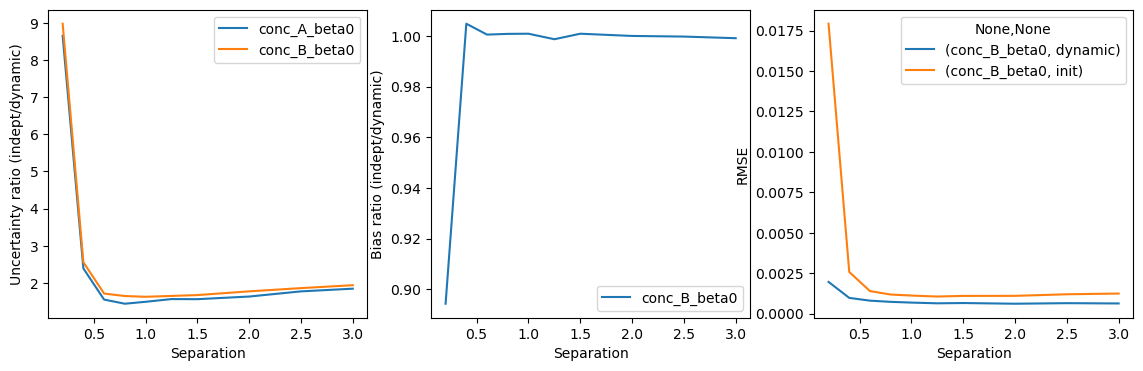

In [49]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(14, 4))

ratio_linked = full_sim_data_linked.groupby(level=[0,1,2]).std().loc['init']\
    / full_sim_data_linked.groupby(level=[0,1,2]).std().loc['dynamic']
ratio_sep_linked = ratio_linked.groupby(level=0).mean()
ratio_sep_linked[['conc_A_beta0','conc_B_beta0']].plot(ax=ax1)


bias_init = full_sim_data_linked.groupby(level=[0,1,2]).mean().loc['init']
bias_dyn = full_sim_data_linked.groupby(level=[0,1,2]).mean().loc['dynamic']

bias_init['conc_B_beta0'] -= simulation_delta
bias_dyn['conc_B_beta0'] -= simulation_delta

bias_ratio = bias_init / bias_dyn
bias_ratio_sep_linked = bias_ratio.groupby(level=0).mean()
bias_ratio_sep_linked[['conc_B_beta0']].plot(ax=ax2)

rmse_linked = (full_sim_data_linked.filter(like='conc_B_beta0')/fid_scaling - simulation_delta).pow(2).groupby(level=[0,1,2]).mean().pow(0.5)
rmse_linked.groupby(level=[0,1]).mean().unstack(level=0).plot(ax=ax3)

ax1.set_xlabel('Separation')
ax2.set_xlabel('Separation')
ax3.set_xlabel('Separation')

ax1.set_ylabel('Uncertainty ratio (indept/dynamic)')
ax2.set_ylabel('Bias ratio (indept/dynamic)')
ax3.set_ylabel('RMSE')

plt.show()

## Final output plot

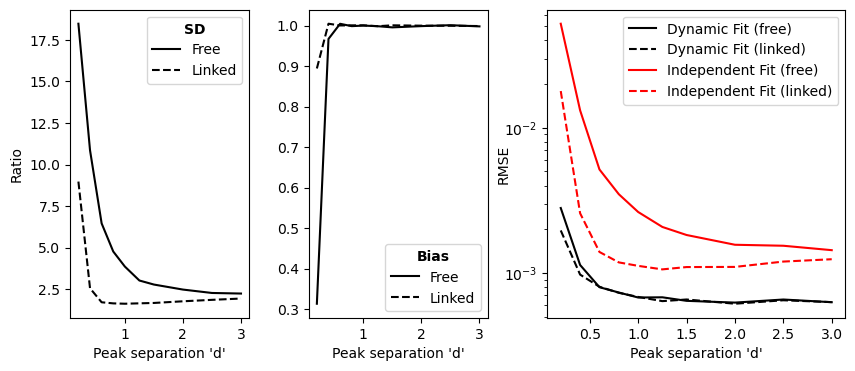

In [75]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(10, 4))
gs = gridspec.GridSpec(ncols=7, nrows=1, figure=fig, wspace=1)

ax1 = fig.add_subplot(gs[0:2])
ax2 = fig.add_subplot(gs[2:4])
ax3 = fig.add_subplot(gs[4:])

ax1.plot(sd_ratio_sep.conc_B_beta0, 'k', label='Free')
ax1.plot(ratio_sep_linked.conc_B_beta0, 'k--', label='Linked')
ax1.legend(title='SD',title_fontproperties={'weight':'bold'})
ax1.set_xlabel("Peak separation 'd'")
ax1.set_ylabel("Ratio")

ax2.plot(bias_ratio_sep.conc_B_beta0, 'k', label='Free')
ax2.plot(bias_ratio_sep_linked.conc_B_beta0, 'k--', label='Linked')
ax2.legend(title='Bias',title_fontproperties={'weight':'bold'})
ax2.set_xlabel("Peak separation 'd'")

df1 = rmse.groupby(level=[0,1]).mean().unstack(level=0)
df2 = rmse_linked.groupby(level=[0,1]).mean().unstack(level=0)
ax3.semilogy(df1.index.to_list(), df1.conc_B_beta0.dynamic.to_list(),'k', label='Dynamic Fit (free)')
ax3.semilogy(df2.index.to_list(), df2.conc_B_beta0.dynamic.to_list(),'k--', label='Dynamic Fit (linked)')
ax3.semilogy(df1.index.to_list(), df1.conc_B_beta0.init.to_list(), 'r', label='Independent Fit (free)')
ax3.semilogy(df2.index.to_list(), df2.conc_B_beta0.init.to_list(),'r--', label='Independent Fit (linked)')
ax3.legend()
ax3.set_xlabel("Peak separation 'd'")
ax3.set_ylabel("RMSE", labelpad=-5)

plt.savefig('../../publication/figures/fig2ab_fmrs_tal.png', dpi=400, bbox_inches='tight', transparent=True)